In [108]:
import pandas as pd
import numpy as np
# import scicit learn decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [109]:
passenger_data = pd.read_csv("Titanic-Dataset.csv")
passenger_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
passenger_data["Embarked"].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [111]:
# train a decision tree model
# select features (PassengerId, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked) and target (survived)
features = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = passenger_data.columns[1]

# encode the sex column (Female = 0, Male = 1)
passenger_data["Sex"] = passenger_data["Sex"].replace({"female": 0, "male": 1})
# Encode the Embarked column (Cherbourg = 0, Queenstown = 1, Southhampton = 2)
passenger_data["Embarked"] = passenger_data["Embarked"].replace({"C": 0, "Q": 1, "S": 2})

# fill missing values in the Age column with the mean
passenger_data["Age"] = passenger_data["Age"].fillna(passenger_data["Age"].mean())

# delete rows with missing values in the Embarked column
passenger_data = passenger_data.dropna(subset=["Embarked"])


In [112]:
# Check for NaN values
if X_train.isnull().values.any():
    print("X_train contains NaN values.")

if y_train.isnull().values.any():
    print("y_train contains NaN values.")

# Check for infinity values
if np.isinf(X_train).values.any():
    print("X_train contains infinity values.")

if np.isinf(y_train).values.any():
    print("y_train contains infinity values.")

In [113]:

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(passenger_data[features], passenger_data[target], test_size=0.2, random_state=42)

In [114]:
# Find rows with NaN values in X_train
nan_rows = X_train[X_train.isnull().any(axis=1)]

# Print the index of these rows
print(nan_rows)

Empty DataFrame
Columns: [PassengerId, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]
Index: []


In [115]:
# create a decision tree model with max_depth=3
model = DecisionTreeClassifier(random_state=42, max_depth=4)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [116]:
# make predictions
predictions = model.predict(X_test)

# calculate the accuracy of the model
accuracy = np.mean(predictions == y_test)  
print("Accuracy: ", accuracy)

Accuracy:  0.7696629213483146


In [117]:
# get the feature importances and print them with their names
feature_importances = model.feature_importances_
feature_names = X_train.columns 
print("Feature importances:")
for name, importance in zip(feature_names, feature_importances):
    print(name, importance)

Feature importances:
PassengerId 0.05995899743776864
Pclass 0.14012344390356904
Sex 0.538700410998131
Age 0.07763353182070774
SibSp 0.035218947000033154
Parch 0.0
Fare 0.12199922794601445
Embarked 0.026365440893775953


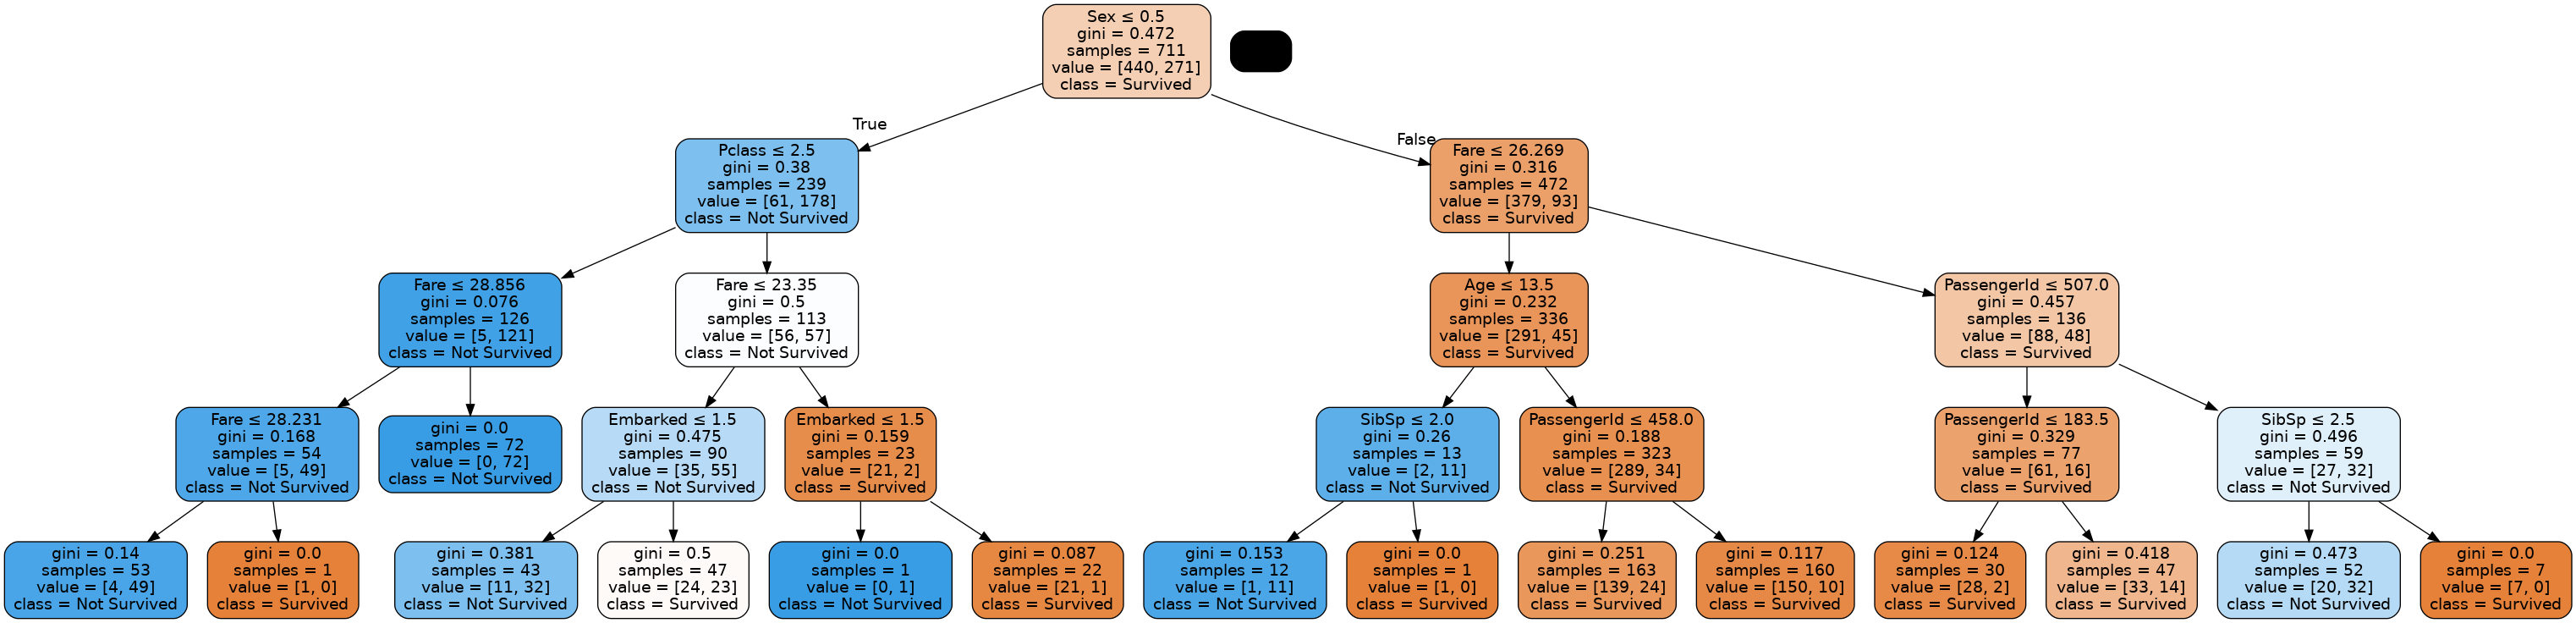

In [118]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Export the decision tree as a dot file
dot_data = export_graphviz(model, out_file=None,
                           feature_names=feature_names,
                           class_names=['Survived', 'Not Survived'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data)

# Generate the image file
graph.write_png('decision_tree.png')

# Display the image
Image(graph.create_png())
